In [1]:
from lightkurve import KeplerLightCurveFile, LightCurve, KeplerTargetPixelFile
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astroquery.vizier import Vizier
import astropy.units as u
from astropy.stats import LombScargle
from astropy.convolution import Box2DKernel, convolve
from copy import deepcopy

In [2]:
ID = 211416749

/Users/JZ/anaconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:907: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)
/Users/JZ/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  
100%|██████████| 20/20 [00:19<00:00,  1.00it/s]


NameError: name 'fill_nans' is not defined

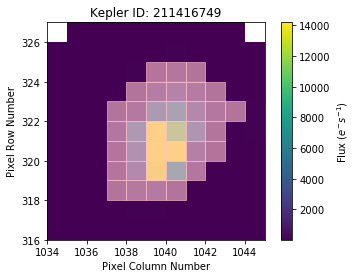

In [3]:
tpf = KeplerTargetPixelFile.from_archive(ID, campaign=5, cadence='short', quality_bitmask='hardest')
aper = np.nanmedian(tpf.flux, axis=0) > np.nanpercentile(np.nanmedian(tpf.flux, axis=0), 70)
tpf.plot(aperture_mask=aper)
lc1 = tpf.to_lightcurve().normalize().remove_nans().remove_outliers().correct(windows=20).remove_outliers()


In [5]:
lc1 = lc1.fill_nans()

/Users/JZ/anaconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:907: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)
/Users/JZ/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until
100%|██████████| 20/20 [00:18<00:00,  1.07it/s]


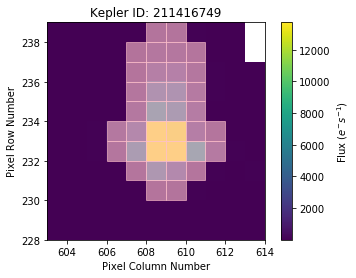

In [6]:
# The first ~3800 cadences have a large gap, it breaks our SFF detrender. Let's get rid of them.
tpf = KeplerTargetPixelFile.from_archive(ID, campaign=16, cadence='short', quality_bitmask='hardest')
aper = np.nanmedian(tpf.flux, axis=0) > np.nanpercentile(np.nanmedian(tpf.flux, axis=0), 70)
tpf.plot(aperture_mask=aper)
lc2 = tpf.to_lightcurve('all')[3800:].normalize().remove_nans().remove_outliers().correct(windows=20).remove_outliers()
lc2 = lc2.fill_nans()

In [27]:
%reload_ext autoreload
%autoreload 2

from lightkurve.periodogram import Periodogram

pd1 = Periodogram.from_lightcurve(lc1)
pd2 = Periodogram.from_lightcurve(lc2)

No KIC was found
No KIC was found


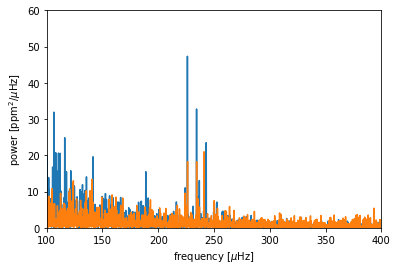

In [38]:
ax = pd1.plot_frequency()
ax.set_xlim(100, 400)
ax.set_ylim(0, 60)
pd2.plot_frequency(ax=ax)

No KIC was found


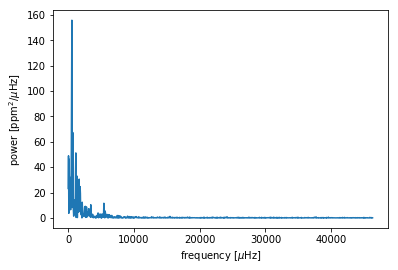

In [74]:
freq = np.linspace(1,4000, 1000) * u.hour
pd1.plot_frequency(freq)

In [72]:
freq

<Quantity [1.15740741e+01, 5.79051273e+01, 1.04236181e+02, 1.50567234e+02,
           1.96898287e+02, 2.43229340e+02, 2.89560394e+02, 3.35891447e+02,
           3.82222500e+02, 4.28553554e+02, 4.74884607e+02, 5.21215660e+02,
           5.67546713e+02, 6.13877767e+02, 6.60208820e+02, 7.06539873e+02,
           7.52870926e+02, 7.99201980e+02, 8.45533033e+02, 8.91864086e+02,
           9.38195140e+02, 9.84526193e+02, 1.03085725e+03, 1.07718830e+03,
           1.12351935e+03, 1.16985041e+03, 1.21618146e+03, 1.26251251e+03,
           1.30884357e+03, 1.35517462e+03, 1.40150567e+03, 1.44783673e+03,
           1.49416778e+03, 1.54049883e+03, 1.58682989e+03, 1.63316094e+03,
           1.67949199e+03, 1.72582305e+03, 1.77215410e+03, 1.81848515e+03,
           1.86481621e+03, 1.91114726e+03, 1.95747831e+03, 2.00380936e+03,
           2.05014042e+03, 2.09647147e+03, 2.14280252e+03, 2.18913358e+03,
           2.23546463e+03, 2.28179568e+03, 2.32812674e+03, 2.37445779e+03,
           2.42078884e+03

<Quantity [0.0864    , 0.08977297, 0.09314595, 0.09651892, 0.09989189,
           0.10326486, 0.10663784, 0.11001081, 0.11338378, 0.11675676,
           0.12012973, 0.1235027 , 0.12687568, 0.13024865, 0.13362162,
           0.13699459, 0.14036757, 0.14374054, 0.14711351, 0.15048649,
           0.15385946, 0.15723243, 0.16060541, 0.16397838, 0.16735135,
           0.17072432, 0.1740973 , 0.17747027, 0.18084324, 0.18421622,
           0.18758919, 0.19096216, 0.19433514, 0.19770811, 0.20108108,
           0.20445405, 0.20782703, 0.2112    , 0.21457297, 0.21794595,
           0.22131892, 0.22469189, 0.22806486, 0.23143784, 0.23481081,
           0.23818378, 0.24155676, 0.24492973, 0.2483027 , 0.25167568,
           0.25504865, 0.25842162, 0.26179459, 0.26516757, 0.26854054,
           0.27191351, 0.27528649, 0.27865946, 0.28203243, 0.28540541,
           0.28877838, 0.29215135, 0.29552432, 0.2988973 , 0.30227027,
           0.30564324, 0.30901622, 0.31238919, 0.31576216, 0.31913514,
      